# APLICACIÓN DE MODELOS MACHINE LEARNING PARA LA DETECCION DE FRAUDE CON TARJETA DE CREDITO


# Estudiante: Eguivar Villca Shirley Carminia 

In [281]:
#libraries

In [282]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn import metrics

In [283]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [284]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,classification_report

In [285]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1.- Loading the dataset

In [286]:
# Read dataset
dataset = pd.read_csv('creditcard.csv')
dataset.describe()
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2.-  Exploratory Data Analisys

In [287]:
# Initial shape
dataset.shape

(284807, 31)

In [288]:
# Maximum value for each column
dataset.max()

Time      172792.000000
V1             2.454930
V2            22.057729
V3             9.382558
V4            16.875344
V5            34.801666
V6            73.301626
V7           120.589494
V8            20.007208
V9            15.594995
V10           23.745136
V11           12.018913
V12            7.848392
V13            7.126883
V14           10.526766
V15            8.877742
V16           17.315112
V17            9.253526
V18            5.041069
V19            5.591971
V20           39.420904
V21           27.202839
V22           10.503090
V23           22.528412
V24            4.584549
V25            7.519589
V26            3.517346
V27           31.612198
V28           33.847808
Amount     25691.160000
Class          1.000000
dtype: float64

In [289]:
#minimum value for each column
dataset.min()

Time        0.000000
V1        -56.407510
V2        -72.715728
V3        -48.325589
V4         -5.683171
V5       -113.743307
V6        -26.160506
V7        -43.557242
V8        -73.216718
V9        -13.434066
V10       -24.588262
V11        -4.797473
V12       -18.683715
V13        -5.791881
V14       -19.214325
V15        -4.498945
V16       -14.129855
V17       -25.162799
V18        -9.498746
V19        -7.213527
V20       -54.497720
V21       -34.830382
V22       -10.933144
V23       -44.807735
V24        -2.836627
V25       -10.295397
V26        -2.604551
V27       -22.565679
V28       -15.430084
Amount      0.000000
Class       0.000000
dtype: float64

In [290]:
# Percentage of null values
# we can see we dont have NULL values
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


# Checking the target classes

No Fraude : 99.83 %
Fraude : 0.17 %


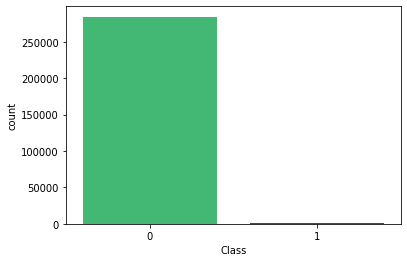

In [291]:
print('No Fraude :', round(dataset['Class'].value_counts()[0]/len(dataset) * 100,2), '%')
print('Fraude :', round(dataset['Class'].value_counts()[1]/len(dataset) * 100,2), '%')
sns.countplot('Class',data=dataset, palette=["#2ecc71","#34495e"])

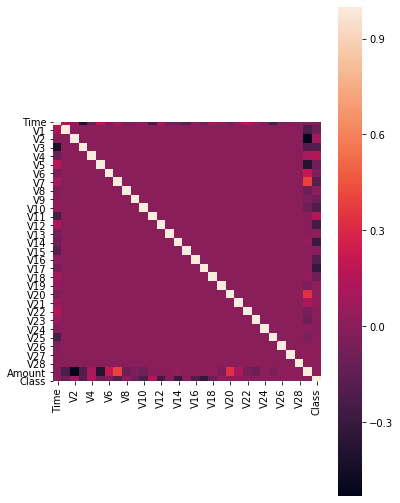

In [292]:
# Correlation matrix
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(6, 9))
sns.heatmap(corrmat, vmax=1, square=True);

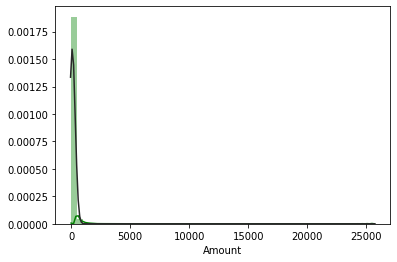

<Figure size 432x288 with 0 Axes>

In [293]:
# Amount column
sns.distplot(dataset['Amount'], fit=norm ,color ="green")
fig = plt.figure()


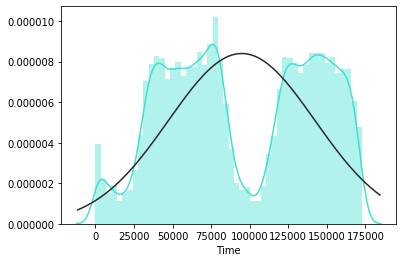

<Figure size 432x288 with 0 Axes>

In [294]:
# Time column
sns.distplot(dataset['Time'], fit=norm , color ="turquoise")
fig = plt.figure()

# 3 Data Cleaning

# 3.1 Undersampling

In [351]:
dataset = dataset.sample(frac=1)

# Divide by class: amount of fraud classes 492 rows.
fraud_df = dataset.loc[dataset['Class'] == 1]
no_fraud_df = dataset.loc[dataset['Class'] == 0]#[:492]

# Random under-sampling
df_class_0_under = no_fraud_df.sample(497)
df_test_under = pd.concat([df_class_0_under, fraud_df], axis=0)

#new dataframe
new_df = df_test_under

print('Random under-sampling:')
#print(new_df.Class.value_counts())
target_count = new_df.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


Random under-sampling:
Class 0: 497
Class 1: 492
Proportion: 1.01 : 1


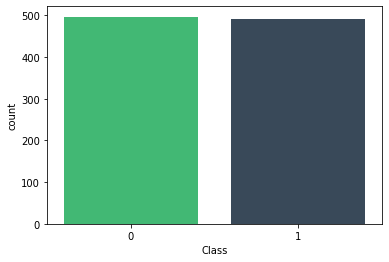

In [352]:
sns.countplot('Class',data=new_df, palette=["#2ecc71","#34495e"])
plt.show()



In [353]:
#new dataframe balanced
new_df = df_test_under
new_df.head()
new_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,...,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,86632.178969,-2.431076,1.795904,-3.535569,2.222851,-1.577016,-0.708112,-2.776631,0.257305,-1.275847,...,0.363237,-0.019903,-0.030451,-0.055637,0.030604,0.035868,0.083258,0.032067,108.143478,0.497472
std,47334.547251,5.520046,3.689006,6.206365,3.227941,4.213618,1.743988,5.845849,4.906476,2.333312,...,2.797568,1.161814,1.199118,0.562095,0.657363,0.494780,1.034338,0.438531,238.638798,0.500247
min,406.000000,-30.552380,-8.402154,-31.103685,-3.780127,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152909,-7.263482,-1.869290,0.000000,0.000000
25%,46421.000000,-3.043541,-0.261262,-5.111658,-0.177446,-1.823877,-1.602523,-3.103570,-0.225890,-2.322716,...,-0.162763,-0.544216,-0.240385,-0.400774,-0.320311,-0.295155,-0.062318,-0.062780,1.500000,0.000000
50%,78019.000000,-0.868904,0.914476,-1.373154,1.361866,-0.417809,-0.674517,-0.639548,0.140989,-0.711798,...,0.126731,0.002328,-0.031930,0.011574,0.057425,-0.010429,0.055907,0.033845,19.990000,0.000000
75%,130684.000000,1.027319,2.871121,0.320072,4.180779,0.516785,0.071260,0.298621,0.856122,0.148341,...,0.652941,0.519262,0.182032,0.371951,0.405316,0.334808,0.455179,0.211933,99.990000,1.000000
max,171745.000000,2.302228,22.057729,3.533609,12.114672,11.095089,6.474115,7.625013,20.007208,5.628747,...,27.202839,8.361985,5.466230,1.144151,2.208209,2.745261,3.052358,2.968662,2441.880000,1.000000


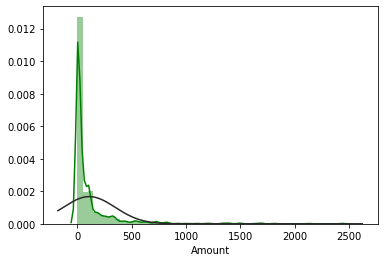

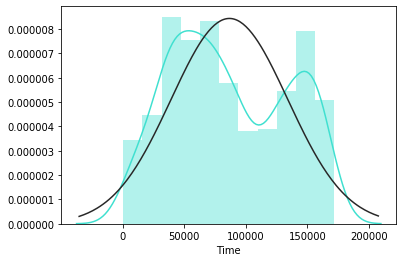

<Figure size 432x288 with 0 Axes>

In [354]:
sns.distplot(new_df['Amount'], fit=norm ,color ="green")
fig = plt.figure()
sns.distplot(new_df['Time'], fit=norm , color ="turquoise")
fig = plt.figure()

# 4 Machine Learning Models

In [355]:
#Set target attribute  
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Split data into training and test
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

print ('Number of transactions train dataset: ', len(X_train))
print ('Number of transactions test dataset: ', len(X_test))
print ('Total number of transactions: ', len(X_train)+len(X_test))
X_train = X_train.values
X_test  = X_test.values
y_train = y_train.values
y_test  = y_test.values

Number of transactions train dataset:  692
Number of transactions test dataset:  297
Total number of transactions:  989


In [356]:
#pip install mlxtend
# Variables to compare algorithms
results = []
names = []
# prepare configuration for cross validation test harness
seed = 7
scoring = 'accuracy'

# 4.1 Logistic Regression

In [357]:
model_LogisticRegression = LogisticRegression()

In [358]:
#Trainning
model_LogisticRegression.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [359]:
# Predicting
y_pred = model_LogisticRegression.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(15)

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


In [360]:
# adding to boxplot graphic to compare
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model_LogisticRegression, X_test, y_test, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('LogisticsRegression')


C:\Users\carminia.eguivar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\carminia.eguivar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\carminia.eguivar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939:

# Learning Curve 

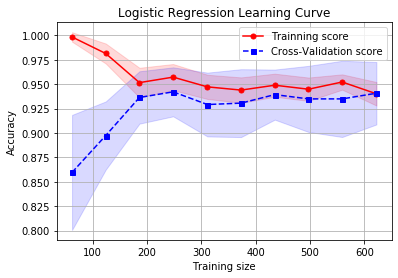

In [230]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model_LogisticRegression,
                        X=X_train, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Trainning score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Cross-Validation score')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Logistic Regression Learning Curve')
plt.legend(loc='upper right')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Confusion matrix: Logistic Regression
[[148   7]
 [ 22 120]]


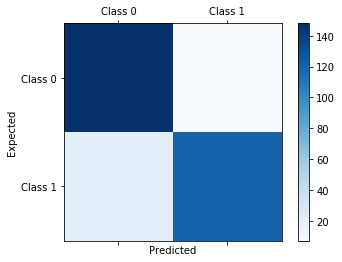

In [231]:
#Confusion matrix
print("Confusion matrix: Logistic Regression")
conf_mat=confusion_matrix(y_test, y_pred)
print(conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Metrics

In [361]:
# Metrics by Training and Test
print ('Metrics with train dataset: ')
train_pred = model_LogisticRegression.predict(X_train)
print (classification_report(y_train, train_pred))
print ('Metrics with test dataset: ')
test_pred = model_LogisticRegression.predict(X_test)
print (classification_report(y_test, test_pred))

Metrics with train dataset: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       342
           1       0.96      0.91      0.94       350

    accuracy                           0.94       692
   macro avg       0.94      0.94      0.94       692
weighted avg       0.94      0.94      0.94       692

Metrics with test dataset: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       155
           1       0.96      0.94      0.95       142

    accuracy                           0.95       297
   macro avg       0.95      0.95      0.95       297
weighted avg       0.95      0.95      0.95       297



In [325]:
#print ('Score with test data set: ', model_LogisticRegression.score(X_test, y_test))
#print ('Score with train data set: ', model_LogisticRegression.score(X_train, y_train))

In [362]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("accuracy:",accuracy) 
precision = metrics.precision_score(y_pred,y_test)
print("precision:",precision) 
f1_score = metrics.f1_score(y_pred,y_test)
print("f1_score:",f1_score) 
recall_score = metrics.recall_score(y_pred,y_test)
print("recall_score/sensitivity:",recall_score) 

accuracy: 0.9528619528619529
precision: 0.9436619718309859
f1_score: 0.9503546099290779
recall_score/sensitivity: 0.9571428571428572


# 4.2 Decision Tree

In [363]:
model_DecisionTree = DecisionTreeClassifier()

In [364]:
#Trainning
model_DecisionTree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [365]:
# Predicting
y_pred = model_DecisionTree.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(15)

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
5,1,1
6,0,0
7,0,0
8,1,1
9,1,1


In [366]:
# adding to boxplot graphic to compare
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model_DecisionTree, X_test, y_test, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('DecisionTree')

C:\Users\carminia.eguivar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Learning Curve

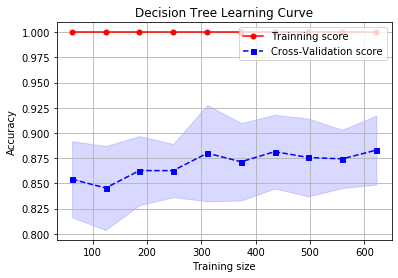

In [331]:
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model_DecisionTree,
                        X=X_train, y=y_train, 
                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10,
                        n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# graficando las curvas
plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Trainning score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Cross-Validation score')
plt.fill_between(train_sizes, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.title('Decision Tree Learning Curve')
plt.legend(loc='upper right')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.show()

Confusion matrix: Decision Tree
[[136  19]
 [  7 135]]


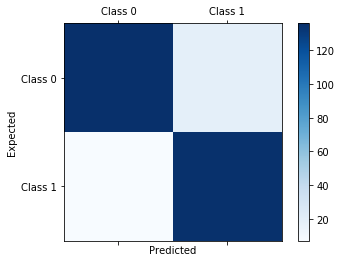

In [367]:
#Confusion matrix
print("Confusion matrix: Decision Tree")
conf_mat=confusion_matrix(y_test, y_pred)
print(conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# Metrics

In [368]:
# Metrics by Training and Test
print ('Metrics with train dataset: ')
train_pred = model_DecisionTree.predict(X_train)
print (classification_report(y_train, train_pred))
print ('Metrics with test dataset: ')
test_pred = model_DecisionTree.predict(X_test)
print (classification_report(y_test, test_pred))

Metrics with train dataset: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       350

    accuracy                           1.00       692
   macro avg       1.00      1.00      1.00       692
weighted avg       1.00      1.00      1.00       692

Metrics with test dataset: 
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       155
           1       0.88      0.95      0.91       142

    accuracy                           0.91       297
   macro avg       0.91      0.91      0.91       297
weighted avg       0.92      0.91      0.91       297



In [242]:
##print ('Score with test data set: ', model_DecisionTree.score(X_test, y_test))
##print ('Score with train data set: ', model_DecisionTree.score(X_train, y_train))

In [369]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print("accuracy:",accuracy) 
precision = metrics.precision_score(y_pred,y_test)
print("precision:",precision) 
f1_score = metrics.f1_score(y_pred,y_test)
print("f1_score:",f1_score) 
recall_score = metrics.recall_score(y_pred,y_test)
print("recall_score/sensitivity:",recall_score) 

accuracy: 0.9124579124579124
precision: 0.9507042253521126
f1_score: 0.9121621621621622
recall_score/sensitivity: 0.8766233766233766


# Conclusion

#### Se concluye que la regresión logística tiene una precisión del 95.2%, mientras que el árbol de decisión muestra un 91.2%. Por lo tanto, concluimos que el algorithmo the Regresion Logistica tiene un mejor desempeño como se puede apreciar en la siguiente grafica comparativa.

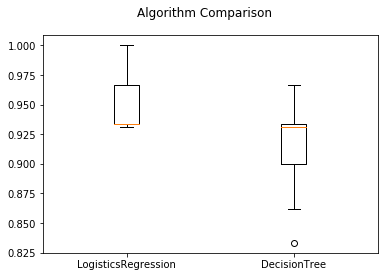

In [370]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()